# Text Analytics and Natural Language Processing using Graphs

In the following we will focus on analyzing textual documents and leverage on graph analysis in order to identify insight and extract relevant information. 

In particular in the following we will show you how to:

* Extract structured information from text by using NLP techniques and models
* Build different type of graphs starting from the information extracted in the previous point
* Analyze the graph

### Load Dataset

In [1]:
import nltk 

In [2]:
import numpy as np

import pandas as pd
import networkx as nx

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
from nltk.corpus import reuters

In [5]:
corpus = pd.DataFrame([
    {"id": _id, "clean_text": reuters.raw(_id).replace("\n", ""), "label": reuters.categories(_id)}
    for _id in reuters.fileids()
]).set_index("id")

In [4]:
corpus = pd.read_pickle("corpus.p")

In [90]:
corpus.iloc[10]["clean_text"]

'SUBROTO SAYS INDONESIA SUPPORTS TIN PACT EXTENSION  Mines and Energy Minister Subroto  confirmed Indonesian support for an extension of the sixth  International Tin Agreement (ITA), but said a new pact was not  necessary.      Asked by Reuters to clarify his statement on Monday in  which he said the pact should be allowed to lapse, Subroto said  Indonesia was ready to back extension of the ITA.      "We can support extension of the sixth agreement," he said.  "But a seventh accord we believe to be unnecessary."      The sixth ITA will expire at the end of June unless a  two-thirds majority of members vote for an extension.  '

In [5]:
from collections import Counter
len(Counter([label for document_labels in corpus["label"] for label in document_labels]).most_common())

90

In [6]:
corpus.head()

,label,clean_text,parsed,language
id,,,,
test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...",en
test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...",en
test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...",en
test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...",en
test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...",en


### Language Detection

In [84]:
import langdetect

In [34]:
import numpy as np

def getLanguage(text: str):
    try:
        return langdetect.detect(text)
    except: 
        return np.nan

In [86]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [87]:
corpus["language"].value_counts().head(10)

en    9902
sv     428
de     369
sw      29
so      25
nl       9
pt       7
vi       7
et       4
fr       2
Name: language, dtype: int64

Using fasttext

In [18]:
!curl -w GET https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz > lid.176.ftz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0   534k      0  0:00:01  0:00:01 --:--:--  534k


In [88]:
import fasttext

m = fasttext.load_model("lid.176.ftz")
def getLanguage(text: str):
    return m.predict(text)[0][0].replace("__label__", "")

In [89]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [90]:
corpus["language"].value_counts().head(10)

en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: language, dtype: int64

In [91]:
corpus[corpus["language"]=="ja"].iloc[5]["clean_text"]

'USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  '

### NLP Enrichment

In [92]:
import spacy

In [36]:
nlp = spacy.load('en_core_web_md')

In [37]:
corpus["parsed"] = corpus["clean_text"].apply(nlp)

In [42]:
corpus.loc["test/14832"]["text"]

"THAI TRADE DEFICIT WIDENS IN FIRST QUARTER  Thailand's trade deficit widened to 4.5  billion baht in the first quarter of 1987 from 2.1 billion a  year ago, the Business Economics Department said.      It said Janunary/March imports rose to 65.1 billion baht  from 58.7 billion. Thailand's improved business climate this  year resulted in a 27 pct increase in imports of raw materials  and semi-finished products.      The country's oil import bill, however, fell 23 pct in the  first quarter due to lower oil prices.      The department said first quarter exports expanded to 60.6  billion baht from 56.6 billion.      Export growth was smaller than expected due to lower  earnings from many key commodities including rice whose  earnings declined 18 pct, maize 66 pct, sugar 45 pct, tin 26  pct and canned pineapples seven pct.      Products registering high export growth were jewellery up  64 pct, clothing 57 pct and rubber 35 pct.  "

In [91]:
from spacy import displacy

In [93]:
displacy.render(corpus.loc["test/14832"]["parsed"], style='ent', jupyter=True)

## Graph Generation

In the following, we will show you how to create two different kind of graphs out of a corpus of documents:

* Knowledge base graphs, where the subject-verb-object relation will be encoded to build a semantic graph 
* Bipartite graphs, linking documents with the entities/keywords appearing therein

### Knowledge base

In [7]:
from subject_object_extraction import findSVOs

In [8]:
corpus["triplets"] = corpus["parsed"].apply(lambda x: findSVOs(x, output="obj"))

In [9]:
corpus.head()

,label,clean_text,parsed,language,triplets
id,,,,,
test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...",en,"[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (..."
test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...",en,"[(VERMIN, (EAT, False), STOCKS), (vermin, (con..."
test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...",en,"[(JAPAN, (REVISE, False), DEMAND), (Industry, ..."
test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...",en,"[(Products, (registering, False), growth), (Pr..."
test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...",en,"[(INDONESIA, (SEES, False), PRICE), (Indonesia..."


In [10]:
edge_list = [
    {"id": _id, "source": source.lemma_.lower(), "target": target.lemma_.lower(), "edge": edge.lemma_.lower()}
    for _id, triplets in corpus["triplets"].iteritems()
    for (source, (edge, neg), target) in triplets
]

In [11]:
edges = pd.DataFrame(edge_list)

In [12]:
edges["edge"].value_counts().head(10)

be         7620
have       2675
include    2010
tell       1729
buy        1464
sell       1385
say        1216
take       1172
make       1151
give       1029
Name: edge, dtype: int64

In [13]:
import networkx as nx

In [14]:
G=nx.from_pandas_edgelist(edges, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [15]:
len(G.nodes)

7576

In [28]:
def plotDistribution(serie: pd.Series, nbins: int, minValue=None, maxValue=None):
    _minValue=int(np.floor(np.log10(minValue if minValue is not None else serie.min())))
    _maxValue=int(np.ceil(np.log10(maxValue if maxValue is not None else serie.max())))
    bins = [0] + list(np.logspace(_minValue, _maxValue, nbins)) + [np.inf]
    serie.hist(bins=bins)
    plt.xscale("log")

In [29]:
def graphSummary(graph, bins=10):
    print(nx.info(graph))
    plt.figure(figsize=(20, 8))
    plt.subplot(1,2,1)
    degrees = pd.Series({k: v for k, v in nx.degree(graph)})
    plt.yscale("log")
    plotDistribution(degrees, bins)
    try:
        plt.subplot(1,2,2)
        allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in graph.edges(data=True)})
        plotDistribution(allEdgesWeights, bins)
        plt.yscale("log")
    except:
        pass

In [23]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 7576
Number of edges: 72263
Average in degree:   9.5384
Average out degree:   9.5384


Name: 
Type: MultiDiGraph
Number of nodes: 7576
Number of edges: 72263
Average in degree:   9.5384
Average out degree:   9.5384


/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


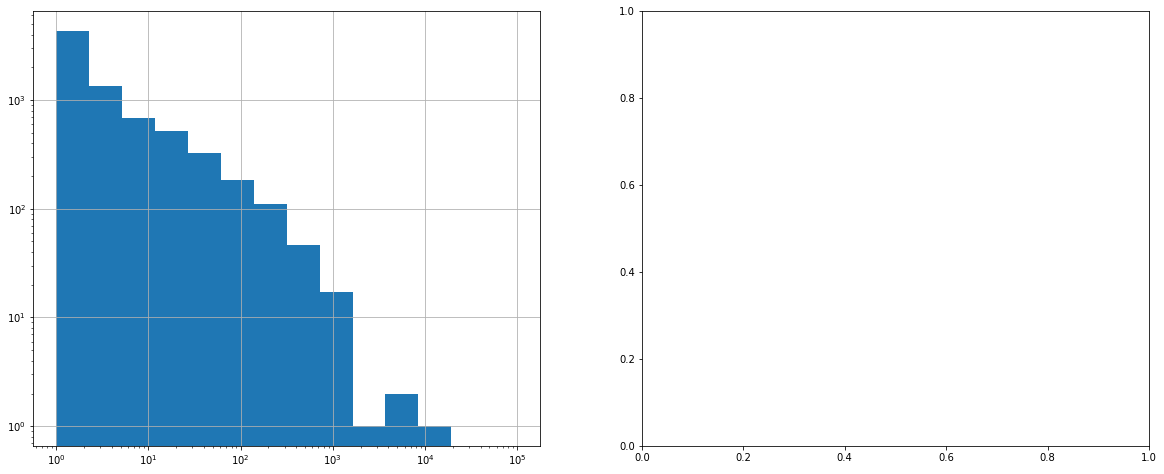

In [21]:
graphSummary(G, bins=15)

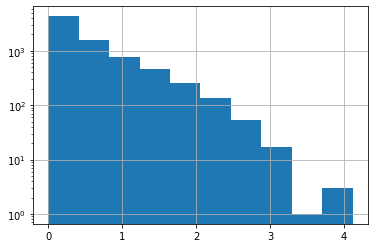

In [24]:
import numpy as np
np.log10(pd.Series({k: v for k, v in nx.degree(G)}).sort_values(ascending=False)).hist()
plt.yscale("log")

Analysis of a certain relation

In [26]:
G=nx.from_pandas_edgelist(edges[edges["edge"]=="claim"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

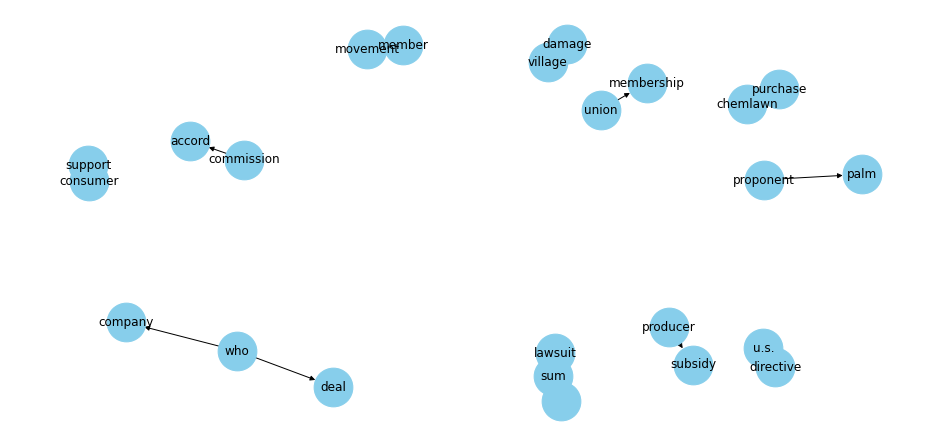

In [28]:
plt.figure(figsize=(13, 6))

pos = nx.spring_layout(G) # k regulates the distance between nodes

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

## Bipartite Graph

Let's start by extracting the keywords from the documents

In [7]:
import gensim

In [8]:
from gensim.summarization import keywords 

In [9]:
text = corpus["clean_text"][0]
keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)

[('trading', 0.4615130639538529),
 ('said', 0.3159855693494515),
 ('export', 0.2691553824958079),
 ('import', 0.17462010006456888),
 ('japanese electronics', 0.1360932626379031),
 ('industry', 0.1286043740379779),
 ('minister', 0.12229815662000462),
 ('japan', 0.11434500812642447),
 ('year', 0.10483992409352465)]

In [10]:
corpus["keywords"] = corpus["clean_text"].apply(
    lambda text: keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)
)

In [11]:
corpus.head()

,label,clean_text,parsed,language,keywords
id,,,,,
test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...",en,"[(trading, 0.461513063953854), (said, 0.315985..."
test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...",en,"[(vermin, 0.3120614380287176), (daily, 0.26110..."
test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...",en,"[(energy, 0.3857636092660117), (demand, 0.3479..."
test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...",en,"[(pct, 0.5457455609144312), (export, 0.2656069..."
test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...",en,"[(indonesia, 0.2410428235502938), (harahap, 0...."


In [12]:
def extractEntities(ents, minValue=1, typeFilters=["GPE", "ORG", "PERSON"]):
    entities = pd.DataFrame([
        {"lemma": e.lemma_, "lower": e.lemma_.lower(), "type": e.label_}
        for e in ents if hasattr(e, "label_")
    ])

    if len(entities)==0:
        return pd.DataFrame()
    
    g = entities.groupby(["type", "lower"])

    summary = pd.concat({
        "alias": g.apply(lambda x: x["lemma"].unique()), 
        "count": g["lower"].count()
    }, axis=1)
    
    return summary[summary["count"]>1].loc[pd.IndexSlice[typeFilters, :, :]]

def getOrEmpty(parsed, _type):
    try:
        return list(parsed.loc[_type]["count"].sort_values(ascending=False).to_dict().items())
    except:
        return []

def toField(ents):
    typeFilters=["GPE", "ORG", "PERSON"]
    parsed = extractEntities(ents, 1, typeFilters)
    return pd.Series({_type: getOrEmpty(parsed, _type) for _type in typeFilters})
    

In [13]:
entities = corpus["parsed"].apply(lambda x: toField(x.ents))

In [14]:
merged = pd.concat([corpus, entities], axis=1) 

In [15]:
merged.head()

,label,clean_text,parsed,language,keywords,GPE,ORG,PERSON
id,,,,,,,,
test/14826,[trade],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...",en,"[(trading, 0.461513063953854), (said, 0.315985...","[(u.s., 13), (japan, 12), (taiwan, 3), (tokyo,...",[],[]
test/14828,[grain],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...",en,"[(vermin, 0.3120614380287176), (daily, 0.26110...","[(china, 2)]",[],[]
test/14829,"[crude, nat-gas]",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...",en,"[(energy, 0.3857636092660117), (demand, 0.3479...","[(japan, 2)]",[],[]
test/14832,"[corn, grain, rice, rubber, sugar, tin, trade]",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...",en,"[(pct, 0.5457455609144312), (export, 0.2656069...","[(thailand, 2)]",[],[]
test/14833,"[palm-oil, veg-oil]",INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...",en,"[(indonesia, 0.2410428235502938), (harahap, 0....","[(indonesia, 4), (malaysia, 2)]","[(cpo, 2)]",[]


We finally create the bipartite graph

In [16]:
edges = pd.DataFrame([
    {"source": _id, "target": keyword, "weight": score, "type": _type}
    for _id, row in merged.iterrows()
    for _type in ["keywords", "GPE", "ORG", "PERSON"] 
    for (keyword, score) in row[_type]
])

In [17]:
G = nx.Graph()
G.add_nodes_from(edges["source"].unique(), bipartite=0)
G.add_nodes_from(edges["target"].unique(), bipartite=1)
G.add_edges_from([
    (row["source"], row["target"])
    for _, row in edges.iterrows()
])

In [18]:
document_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
entity_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 1}

In [19]:
nodes_with_low_degree = {n for n, d in nx.degree(G, nbunch=entity_nodes) if d<5}

In [20]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25752
Number of edges: 100311
Average degree:   7.7905


In [21]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

### Entity-Entity Graph Projection

In [46]:
subGraph = G.subgraph(set(G.nodes) - nodes_with_low_degree)

In [47]:
entityGraph = overlap_weighted_projected_graph(
    subGraph, 
    {n for n, d in subGraph.nodes(data=True) if d["bipartite"] == 1}
)

In [48]:
len(entityGraph.nodes())

2386

In [49]:
degrees = pd.Series({k: v for k, v in nx.degree(entityGraph)})

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


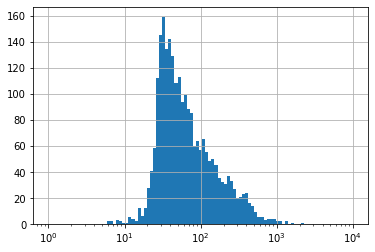

In [50]:
plotDistribution(degrees, 100)

In [51]:
print(nx.info(entityGraph))

Name: 
Type: Graph
Number of nodes: 2386
Number of edges: 120198
Average degree: 100.7527


In [52]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in entityGraph.edges(data=True)})

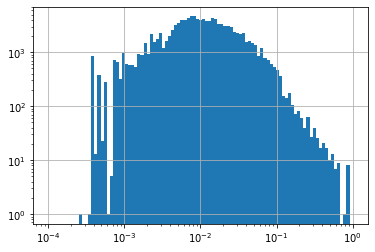

In [53]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")

In [158]:
filteredEntityGraph = entityGraph.edge_subgraph(
    [edge for edge in entityGraph.edges if entityGraph.edges[edge]["weight"]>0.05]
)

In [159]:
print(nx.info(filteredEntityGraph))

Name: 
Type: Graph
Number of nodes: 2265
Number of edges: 8082
Average degree:   7.1364


#### Local and global properties of the graph 

In [87]:
globalKpis = [{
    "shortest_path": nx.average_shortest_path_length(_graph),
    "clustering_coefficient": nx.average_clustering(_graph),
    "global_efficiency": nx.global_efficiency(_graph)
} for components in nx.connected_components(filteredEntityGraph) 
    for _graph in [nx.subgraph(filteredEntityGraph, components)]]

In [90]:
pd.concat([
    pd.DataFrame(globalKpis), 
    pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)])
], axis=1)

,shortest_path,clustering_coefficient,global_efficiency,0
0,4.715074,0.211563,0.227356,2254
1,1.500000,0.000000,0.750000,4
2,1.333333,0.000000,0.833333,3
3,1.000000,0.000000,1.000000,2
4,1.000000,0.000000,1.000000,2


In [93]:
pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)]).sum()

2265

In [95]:
globalKpis[0]

{'shortest_path': 4.715073779178782,
 'clustering_coefficient': 0.21156314975836915,
 'global_efficiency': 0.22735551077454275}

In [97]:
nx.write_gexf(filteredEntityGraph, "filteredEntityGraph.gexf")

In [101]:
betweeness = nx.betweenness_centrality(filteredEntityGraph)

In [106]:
_betweeness = pd.Series(betweeness)

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


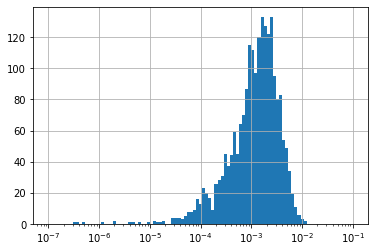

In [108]:
plotDistribution(_betweeness[_betweeness>0], 100)

In [74]:
pageRanks = pd.Series(nx.pagerank(filteredEntityGraph))

In [75]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredEntityGraph)})

In [112]:
kpis = pd.concat({
    "pageRank": pageRanks, 
    "degrees": degrees, 
    "betweeness": _betweeness
}, axis=1)

(1e-05, 0.02)

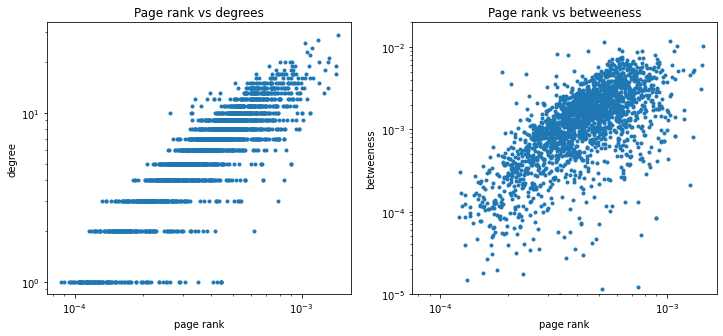

In [120]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Page rank vs degrees")
plt.plot(kpis["pageRank"], kpis["degrees"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("degree")
plt.xscale("log")
plt.yscale("log")

plt.subplot(1,2,2)
plt.title("Page rank vs betweeness")
plt.plot(kpis["pageRank"], kpis["betweeness"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1E-5, 2E-2])

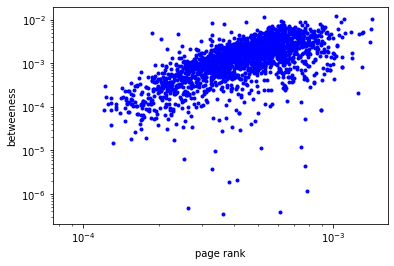

In [114]:
plt.figure(figsize=(6,4))
plt.plot(kpis["pageRank"], kpis["betweeness"], 'b.')
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")

Text(0.5, 1.0, 'Edge Weight Distribution')

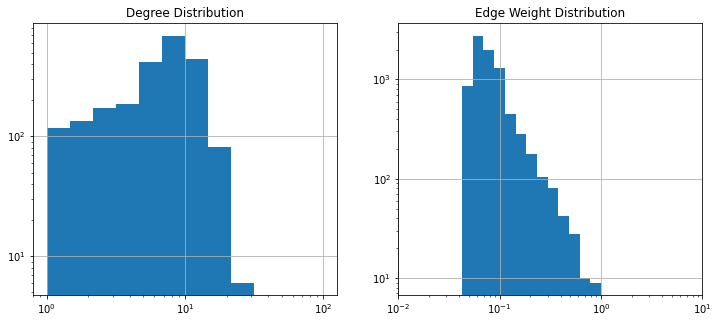

In [73]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")


In [61]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredEntityGraph.edges(data=True)})

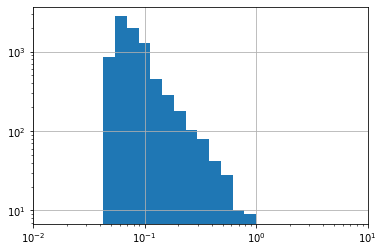

In [66]:
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")

#### Visualization of the Network

In [51]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredEntityGraph)

In [52]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

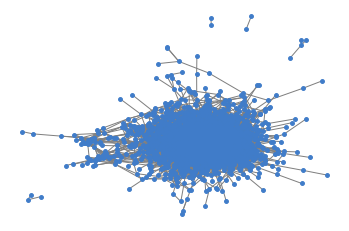

In [53]:
plt.axis("off")
nx.draw_networkx(filteredEntityGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community detection

In [122]:
import community

In [150]:
communities = pd.Series(community.best_partition(filteredEntityGraph))

Text(0, 0.5, '# Members')

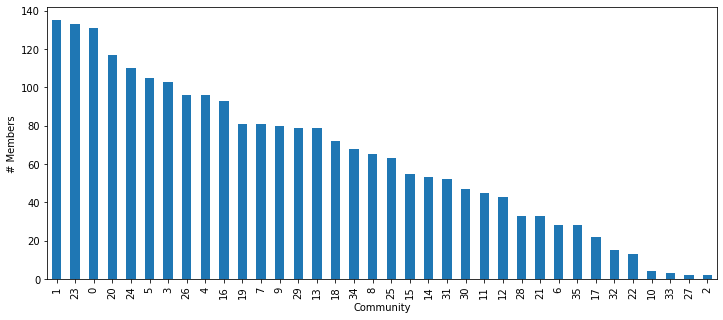

In [151]:
communities.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Community")
plt.ylabel("# Members")

In [206]:
nodes = communities[communities==17].index

In [207]:
nodes

Index(['imports', 'rainfall', 'agreed', 'lira', 'central', 'parana', 'state',
       'greece', 'hours', 'activities', 'start', 'nil', 'greek', 'use',
       'athens', 'turkey', 'waters', 'turkish', 'soybean', 'sao', 'mark',
       'capacity'],
      dtype='object')

In [208]:
smallGrap = nx.subgraph(filteredEntityGraph, nbunch=nodes)

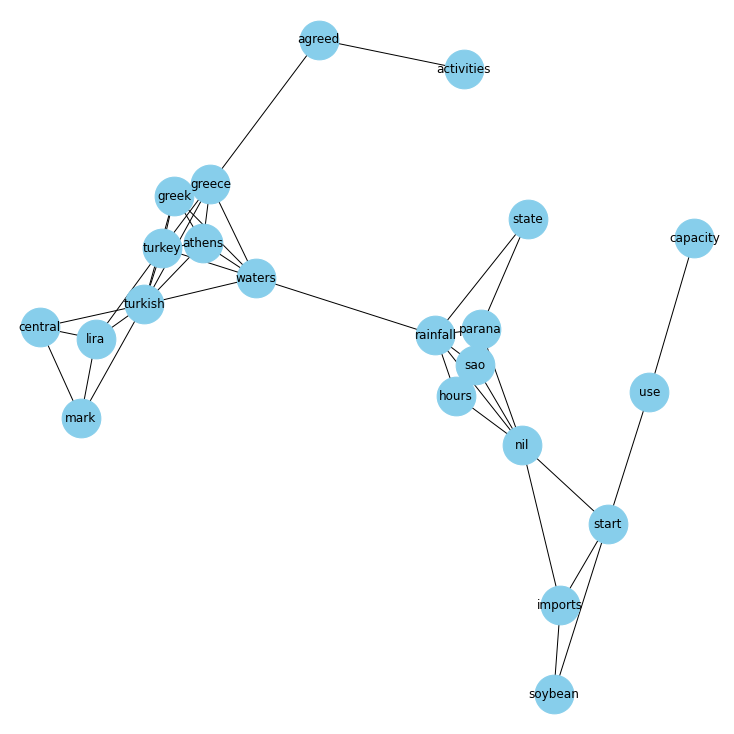

In [213]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(smallGrap) # k regulates the distance between nodes

nx.draw(smallGrap, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

Here we show a Bipartite Closeup of the cluster

In [214]:
bipartiteCloseup = subGraph.edge_subgraph(
    {e for e in subGraph.edges() if len(set(e).intersection(nodes))>0}
)

deg = nx.degree(bipartiteCloseup)

smallGrap = nx.subgraph(bipartiteCloseup, {n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==1 or deg[n]>1})

In [215]:
len([n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==0])

445

In [216]:
len(nodes)

22

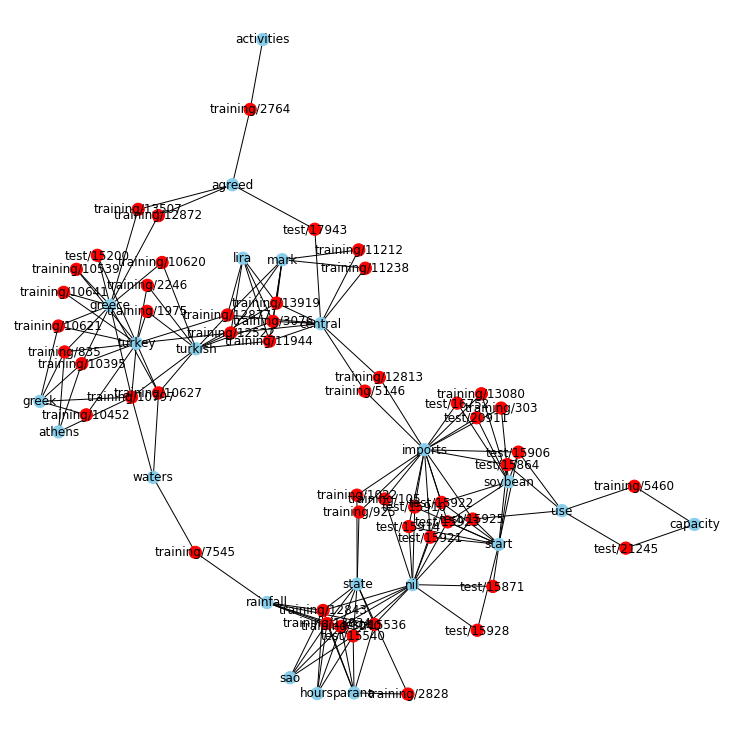

In [217]:
plt.figure(figsize=(10,10))

pos = nx.kamada_kawai_layout(smallGrap) # k regulates the distance between nodes

node_color = ["skyblue" if d["bipartite"]==1 else "red" for n, d in smallGrap.nodes(data=True)]

nx.draw(smallGrap, with_labels=True, node_color=node_color, #'skyblue', 
        node_size=150, edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

#(subGraph.nodes["akzo"])

#### Embeddings

Using TSNE

In [64]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
embeddings=tsne.fit_transform(embeddings.vectors)

In [ ]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

Using Node2Vec

In [218]:
from node2vec import Node2Vec

node2vec = Node2Vec(filteredEntityGraph, dimensions=5) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|██████████| 10/10 [01:48<00:00, 10.84s/it]


Node2Vec allows also to compute a similarity between entities

In [227]:
embeddings.most_similar(positive=["turkey"])

[('turkish', 0.9975333213806152),
 ('lira', 0.9903393983840942),
 ('rubber', 0.9884852170944214),
 ('statoil', 0.9871745109558105),
 ('greek', 0.9846569299697876),
 ('xuto', 0.9830175042152405),
 ('stanley', 0.9809650182723999),
 ('conference', 0.9799597263336182),
 ('released', 0.9793018102645874),
 ('inra', 0.9775203466415405)]

### Document-Document Graph Projection

In [22]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

In [23]:
documentGraph = overlap_weighted_projected_graph(
    G, 
    {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
)

In [24]:
from matplotlib import pyplot as plt

In [25]:
print(nx.info(documentGraph))

Name: 
Type: Graph
Number of nodes: 10788
Number of edges: 12994465
Average degree: 2409.0591


In [26]:
degrees = pd.Series({k: v for k, v in nx.degree(documentGraph)})

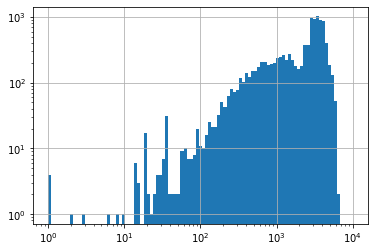

In [32]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [33]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in documentGraph.edges(data=True)})

(0.01, 1)

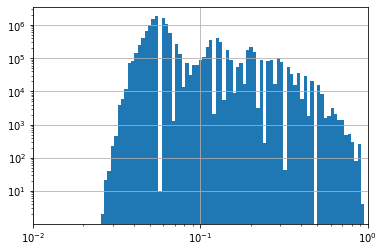

In [34]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-2, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

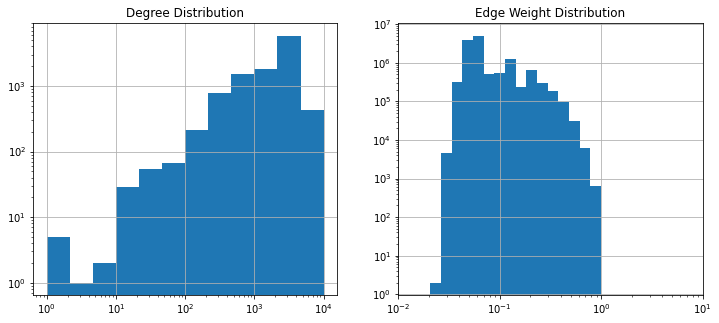

In [35]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

In [36]:
filteredDocumentGraph = documentGraph.edge_subgraph(
    allEdgesWeights[(allEdgesWeights>0.6)].index.tolist()
)

In [37]:
print(nx.info(filteredDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1958
Number of edges: 7884
Average degree:   8.0531


#### Global and Local Properties

In [38]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredDocumentGraph)})

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


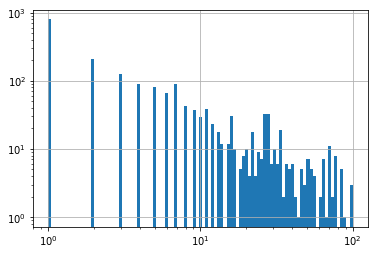

In [39]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [40]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredDocumentGraph.edges(data=True)})

(0.1, 1)

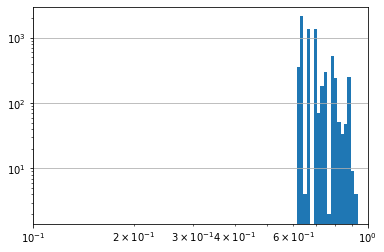

In [41]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

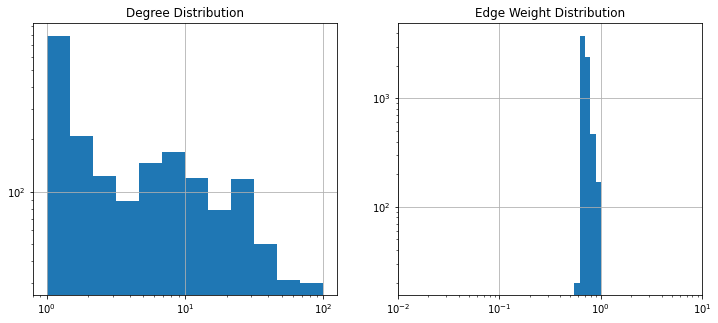

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

#### Core - Periphery Description and Analysis

In [43]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredDocumentGraph)

In [44]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

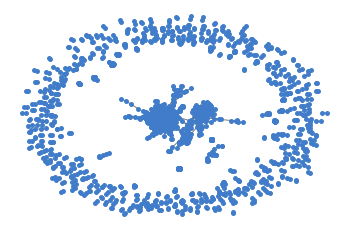

In [45]:
plt.axis("off")
nx.draw_networkx(filteredDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

In [46]:
components = pd.Series({ith: component 
              for ith, component in enumerate(nx.connected_components(filteredDocumentGraph))})

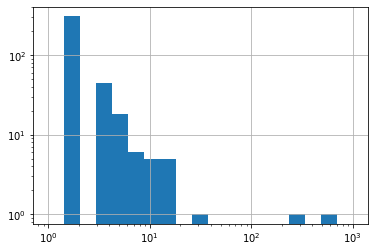

In [47]:
plotDistribution(components.apply(len), nbins=20)
plt.yscale("log")

In [48]:
coreDocumentGraph = nx.subgraph(
    filteredDocumentGraph,
    [node for nodes in components[components.apply(len)>8].values for node in nodes]
)

In [50]:
print(nx.info(coreDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1050
Number of edges: 7112
Average degree:  13.5467


In [51]:
degrees = pd.Series({k: v for k, v in nx.degree(coreDocumentGraph)})

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


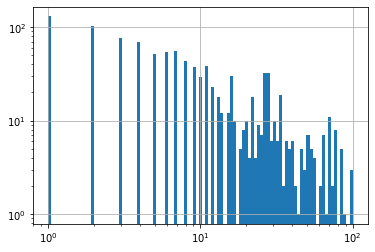

In [52]:
plotDistribution(degrees, 100)
plt.yscale("log")

In [53]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in coreDocumentGraph.edges(data=True)})

(0.1, 1)

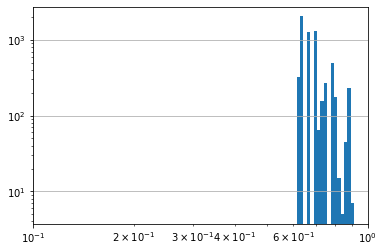

In [54]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

In [55]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(coreDocumentGraph)

In [56]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

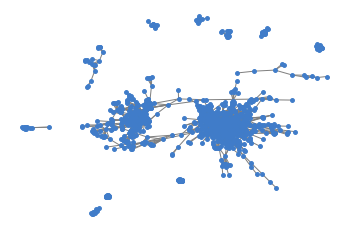

In [57]:
plt.axis("off")
nx.draw_networkx(coreDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community Detection and Topics Clustering

In [58]:
import community

In [59]:
communities = pd.Series(community.best_partition(coreDocumentGraph))

In [60]:
communities = pd.Series(community.best_partition(filteredDocumentGraph))

In [61]:
from collections import Counter

def getTopicRatio(df):
    return Counter([label for labels in df["label"] for label in labels])

In [62]:
communityTopics = pd.DataFrame.from_dict({
    cid: getTopicRatio(corpus.loc[comm.index])
    for cid, comm in communities.groupby(communities)
}, orient="index")

In [63]:
normalizedCommunityTopics = (communityTopics.T / communityTopics.sum(axis=1)).T

<AxesSubplot:>

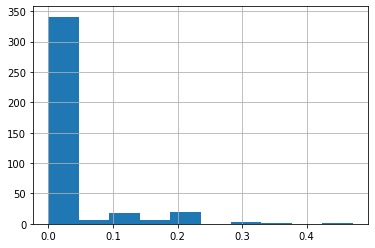

In [74]:
normalizedCommunityTopics.std(axis=1).fillna(0).hist()

Text(0.5, 0, 'Entropy')

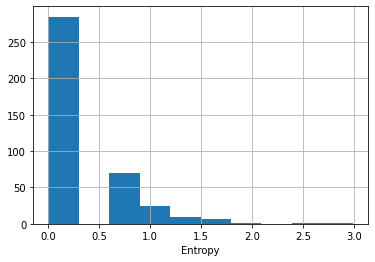

In [78]:
normalizedCommunityTopics.apply(lambda x: np.mean(-np.log(x)), axis=1).hist()
plt.xlabel("Entropy")

In [64]:
normalizedCommunityTopics[normalizedCommunityTopics["gold"]>0]

,earn,money-fx,money-supply,jobs,interest,crude,gas,trade,grain,corn,...,fuel,silver,iron-steel,tea,lei,sorghum,tin,income,coconut-oil,veg-oil
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
topicsCorrelation = normalizedCommunityTopics.corr().fillna(0)
topicsCorrelation[topicsCorrelation<0.8]=0


In [66]:
topicsGraph = nx.from_pandas_adjacency(topicsCorrelation)

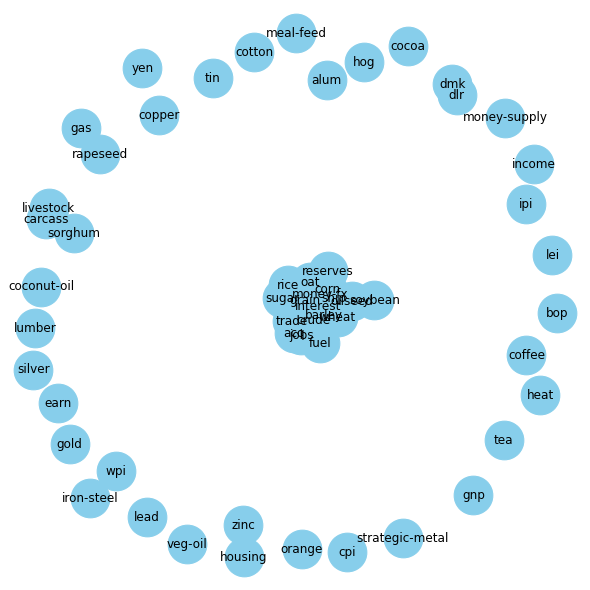

In [80]:
plt.figure(figsize=(8,8))

pos = nx.spring_layout(topicsGraph) # k regulates the distance between nodes

nx.draw(topicsGraph, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

In [68]:
filteredTopicsGraph = nx.subgraph(
    topicsGraph,
    [node for component in nx.connected_components(topicsGraph) if len(component)>3 for node in component]
)

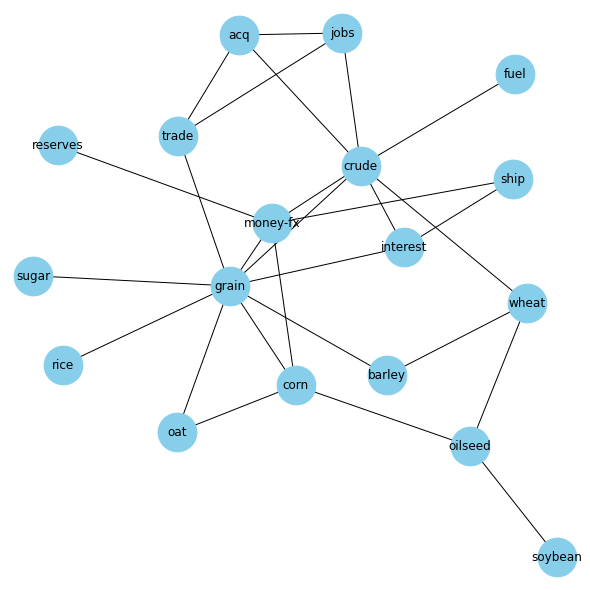

In [83]:
plt.figure(figsize=(8,8))

pos = nx.kamada_kawai_layout(filteredTopicsGraph) # k regulates the distance between nodes

nx.draw(filteredTopicsGraph, with_labels=True, node_color='skyblue', node_size=1500, 
        edge_cmap=plt.cm.Blues, pos = pos)

plt.show()

#### Embeddings for the Document-Document Graph

In [114]:
from node2vec import Node2Vec

node2vec = Node2Vec(coreDocumentGraph, dimensions=20) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:45<00:00,  4.54s/it]


In [178]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [179]:
embedding2d=tsne.fit_transform(embeddings.vectors)

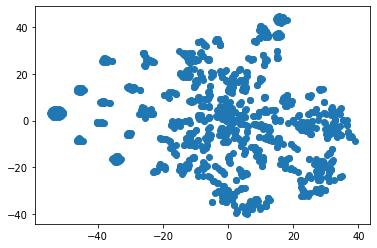

In [180]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

In [182]:
pd.DataFrame(embeddings.vectors

(1050, 20)

In [187]:
pd.DataFrame(embeddings.vectors, index=embeddings.index2word)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
test/20442,2.180002,-0.016241,2.949166,-4.782610,0.844586,1.215374,2.444176,-2.427721,3.305841,-3.077552,-1.879447,2.176230,-6.773152,2.432674,0.393964,-3.832479,-1.953582,3.503694,-2.724949,-1.452532
test/20221,2.317131,0.263268,2.100156,-5.085055,1.178485,0.801742,2.444102,-1.781911,3.506723,-2.786448,-1.543815,2.389623,-6.751265,2.502510,0.472224,-3.511524,-1.918851,3.168786,-2.480616,-1.296138
test/20368,1.915733,0.560151,2.294810,-5.003971,0.957688,1.152616,2.644406,-1.702958,3.523943,-2.926052,-2.083752,2.024016,-6.722512,2.327187,0.208466,-3.314965,-1.780674,3.393579,-2.747238,-1.132376
test/16715,1.470909,-0.115966,0.159240,-3.906876,2.953194,-2.328180,3.012663,1.158044,2.233574,-1.419858,-0.080854,-2.484683,-4.044915,6.241037,1.684160,2.539123,2.845320,2.689971,-5.233764,-2.766841
test/21227,1.280023,2.885551,2.181041,-4.616887,0.945458,-1.987687,0.896733,0.556177,0.184699,0.221619,-1.983269,0.139358,-6.435606,3.201023,1.308957,-2.295082,1.264864,4.029081,-3.568491,-2.037338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training/1467,-1.010914,0.025630,0.574032,-0.043353,-0.554051,-0.198045,-0.204726,-0.152810,0.018770,-0.185199,-0.526948,-0.819479,0.167203,-0.184412,-1.457262,-0.584715,0.010820,-0.472043,0.415921,-0.417111
training/13223,0.128454,0.334262,1.284377,0.333758,-0.549091,-0.153722,0.688675,0.212896,0.569149,0.159646,0.389598,0.057534,1.152468,0.065822,-0.431405,-0.025363,-0.270550,-1.032881,0.080688,0.803169
training/5912,-0.201315,0.975095,-0.212452,0.954210,0.054515,0.497477,-0.230554,0.006523,-0.285691,0.707735,0.300153,0.158715,0.762308,-0.126800,-0.139088,-0.134499,-0.274796,-0.924033,0.166995,0.001337
training/534,0.340691,-0.273077,0.064055,1.128778,0.827550,-0.285812,0.574501,0.123575,0.261383,0.974173,0.690603,-0.007668,0.351308,0.123112,-0.929968,0.703015,0.281189,0.452209,-0.170394,0.587609


In [86]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25752
Number of edges: 100311
Average degree:   7.7905


Extracting the embeddings to be used in shallow-learning models. Please do vary the *dimensions* and the *window* parameters to generate multiple combination to be cross-validated

In [126]:
from node2vec import Node2Vec

dimensions = 10
window = 20

node2vec = Node2Vec(G, dimensions=dimensions) 
model = node2vec.fit(window=window) 
embeddings = model.wv 

pd.DataFrame(embeddings.vectors, index=embeddings.index2word)\
    .to_pickle("bipartiteGraphEmbeddings_{dimensions}_{window}.p")

Generating walks (CPU: 1): 100%|██████████| 10/10 [27:21<00:00, 164.17s/it]
